# EJEMPLO DE USO DE TÉCNICAS CLÁSICAS PARA LA EXPLORACIÓN DE TEXTOS

NLTK book: http://www.nltk.org/book/



In [5]:
!pip install pyldavis
!pip install wordcloud

## Carga de un conjunto predefinido

El conjunto de datos son noticias clasificadas en temáticas.

In [1]:
from sklearn.datasets import fetch_20newsgroups
from time import time
#import pandas as pd

t0 = time()
data, clases = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             return_X_y=True)


print("done in %0.3fs." % (time() - t0))


done in 1.382s.


In [2]:
print(len(data))

11314


In [3]:
# Exploramos uno de los elementos
print(clases[0])
data[0]

17


"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

### Visualización con Nubes de Palabras

https://www.datacamp.com/community/tutorials/wordcloud-python

Un documento

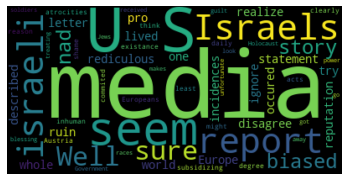

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=STOPWORDS).generate(data[0])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

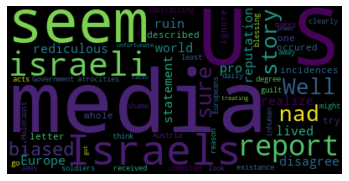

In [8]:
wordcloud = WordCloud().generate(data[0])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Varios documentos

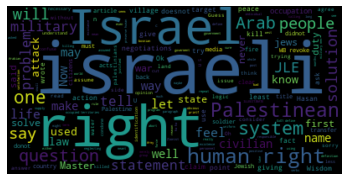

In [7]:
qdocs = [doc for doc in data if 'israel' in doc]

wordcloud = WordCloud(stopwords=STOPWORDS).generate(' '.join(qdocs))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

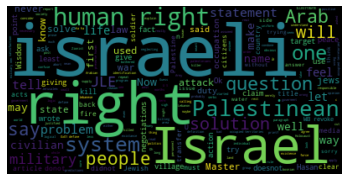

In [9]:
qdocs = [doc for doc in data if 'israel' in doc]

wordcloud = WordCloud().generate(' '.join(qdocs))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Segmentación de texto



In [10]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juanl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk.tokenize import sent_tokenize, word_tokenize
from functools import reduce
import string

#Dividir de forma Naïve
print(data[0].split('. '))

#Dividir con un segmentador
print(sent_tokenize(data[0]))

#Tokens por sentencia
tokens_sentences = [word_tokenize(t) for t in sent_tokenize(data[0])]

print(tokens_sentences)

alltokens = reduce(lambda x,y: x+y, tokens_sentences, [])

alltokens = [w for w in alltokens if w not in string.punctuation]

#Tokenizar todo
print(alltokens)

#Tokenizar sin segmentar
print(word_tokenize(data[0]))

["Well i'm not sure about the story nad it did seem biased", 'What\nI disagree with is your statement that the U.S', 'Media is out to\nruin Israels reputation', 'That is rediculous', 'The U.S', 'media is\nthe most pro-israeli media in the world', 'Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured', 'The U.S', 'media as a whole seem to try to\nignore them', 'The U.S', 'is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree)', 'So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away', 'After all, look how the Jews are treating other races\nwhen they got power', 'It is unfortunate.\n']
["Well i'm not sure about the story nad it did seem biased.", 'What\nI disagree with is your statemen

In [13]:
sent_tokenize('The number 100. 000 is too big')

['The number 100.', '000 is too big']

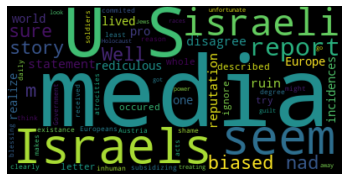

In [14]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(' '.join(alltokens))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Cálculo de vectores dispersos (TF y TF-IDF)

In [15]:
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [24]:
#Parámetros para el descubrimiento de tópicos

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20

data_samples = data[:n_samples]

# Vectorización del conjunto "20 newsgroups" 
# Se aplican heurísticas para eliminar términos no útiles y se procesa el texto
# para eliminar secciones de las noticias.
# Se eliminan las palabras que ocurren solo una vez o en el 95% de los documentos


tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

done in 0.287s.
done in 0.272s.



In [25]:
# Veamos el vector de un documento
print(tfidf[0])
print(data_samples[0])

  (0, 708)	0.12621877625178227
  (0, 410)	0.11650651629173196
  (0, 493)	0.1631127602376565
  (0, 548)	0.11873384536901997
  (0, 130)	0.13595955391213657
  (0, 567)	0.13595955391213657
  (0, 412)	0.12831668397369733
  (0, 750)	0.15376128408643466
  (0, 841)	0.18564440175793037
  (0, 206)	0.15810189392327795
  (0, 764)	0.1640284908630232
  (0, 748)	0.13595955391213657
  (0, 904)	0.08983671288492111
  (0, 923)	0.11966934266418663
  (0, 527)	0.1690393571774018
  (0, 432)	0.13369075280946802
  (0, 988)	0.12740095334833063
  (0, 488)	0.3750048191807266
  (0, 717)	0.17767638066823058
  (0, 587)	0.6454209423982519
  (0, 862)	0.1551447391479567
  (0, 286)	0.11115911128919416
  (0, 867)	0.15810189392327795
  (0, 881)	0.11227372176926384
Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realiz

## Vecinos más cercanos en el espacio vectorial resultante

In [26]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=5, n_jobs=-1)
neigh.fit(tfidf)

NearestNeighbors(n_jobs=-1)

In [27]:
test = tfidf_vectorizer.transform(['care hiv'])
print(test)

  (0, 448)	0.8547195394375919
  (0, 178)	0.5190900778319605


In [28]:
neigh.kneighbors(test, return_distance=True)

(array([[0.75670939, 1.        , 1.        , 1.        , 1.        ]]),
 array([[200, 258, 764, 975, 255]], dtype=int64))

In [29]:
data[200]

'------------- cut here -----------------\nlimits of AZT\'s efficacy and now suggest using the drug  either sequentially \nwith other drugs or in a kind of AIDS  treatment "cocktail" combining a number \nof drugs to fight the  virus all at once.  "Treating people with AZT alone \ndoesn\'t  happen in the real world anymore," said Dr. Mark Jacobson of the  \nUniversity of California--San Francisco.  Also, with recent  findings \nindicating that HIV replicates rapidly in the lymph  nodes after infection, \nphysicians may begin pushing even harder  for early treatment of HIV-infected \npatients.\n==================================================================    \n\n"New Infectious Disease Push" American Medical News (04/05/93) Vol. 36, No. \n13, P. 2 \n\n     The Center for Disease Control will launch a worldwide network to track \nthe spread of infectious diseases and detect drug-resistant or new strains in \ntime to help prevent their spread.  The network is expected to cost between 

## EXPLORAMOS EL CONTENIDO GENERANDO TÓPICOS

In [30]:
# Creamos un modelo con Latent Diritchlet Allocation (LDA)

# Use tf (raw term count) features for LDA.

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."% (n_samples, n_features))

lda = LatentDirichletAllocation(n_components=n_components, max_iter=1000,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0, n_jobs=-1)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 178.882s.

Topics in LDA model:
Topic #0: edu com mail graphics send ftp pub contact available version computer list ca faq cs machines ray internet type 128
Topic #1: just like don think know good ve way time ll car going really right year want better people make years
Topic #2: hiv research health 1993 april program new aids science information university national disease medical study care development 000 states rates
Topic #3: windows use thanks using does software new know file problem help need time pc 00 like card work window program
Topic #4: speed driver performance clock rate bus value faster transfer imagine result math long try takes shows display mention 130 figure
Topic #5: god people does think don just jesus say believe know time law good bible israel did way life point make
Topic #6: 10 55 11 12 game 18 15 team 17 20 25 period 19 22 play 21 13 23 14 24
Topic #7: government key use law pu

In [31]:
xlda = lda.transform(tf)

In [32]:
# Mostramos el primer documento
print(data[0])
print(xlda[0])
print("Tópico:", np.argmax(xlda[0]))

Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they report more clearly on the
atrocities.
	What is a shame is that in Austria, daily reports of
the inhuman acts commited by Israeli soldiers and the blessing
received from the Government makes some of the Holocaust guilt
go away. After all, look how the Jews are treating other races
when they got power. It is unfortunate.

[0.00344887 0.0849265  0.00344836 0.00344863 0.00344833 0.82891443
 0.00344846 0.06201769 0.00344962 0.00344912]
Tópico: 5


In [33]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.188665  0.062746       1        1  26.686021
5     -0.226016  0.008758       2        1  16.890050
3     -0.002462 -0.142543       3        1  12.301104
0      0.157396 -0.186493       4        1   9.202785
8     -0.216502  0.145423       5        1   8.643439
7     -0.075400 -0.142579       6        1   8.547184
6      0.257777  0.274841       7        1   7.060377
9      0.162788 -0.050219       8        1   6.251371
2      0.071373 -0.078394       9        1   3.721060
4      0.059711  0.108461      10        1   0.696609, topic_info=           Term        Freq       Total Category  logprob  loglift
323         edu  473.000000  473.000000  Default  30.0000  30.0000
855       speed  136.000000  136.000000  Default  29.0000  29.0000
312       drive  236.000000  236.000000  Default  28.0000  28.0000
405         god  348.000000  348.000000  Default  27.0000  27.0000
850       space  217.000000  217.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
61           92    0.112548   43.071000  Topic10  -8.5300  -0.9805
107     archive    0.112519   56.280664  Topic10  -8.5303  -1.2483
73        added    0.112515   40.839992  Topic10  -8.5303  -0.9276
777      robert    0.112512   41.186231  Topic10  -8.5303  -0.9361
668  particular    0.112511   61.655480  Topic10  -8.5303  -1.3396

[510 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         3  0.806146     00
0         4  0.027798     00
0         5  0.018532     00
0         7  0.138991     00
1         1  0.280842    000
...     ...       ...    ...
997       2  0.035097  years
997       5  0.175486  years
997       7  0.074094  years
997       8  0.046796  years
997       9  0.054596  years

[1300 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 4, 1, 9, 8, 7, 10, 3, 5])

### Métodos alternativos para construir tópicos


In [34]:
# Creamos dos modelos de descomposición de matrices (NMF)

# Modelo con normalización de Frobenius
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))

t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

# Modelo con divergencia estadística KL
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

c:\users\juanl\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\juanl\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.215s.

Topics in NMF model (Frobenius norm):
Topic #0: just people don think like know time good make way really say right ve want did ll new use years
Topic #1: windows use dos using window program os drivers application help software pc running ms screen files version card code work
Topic #2: god jesus bible faith christian christ christians does heaven sin believe lord life church mary atheism belief human love religion
Topic #3: thanks know does mail advance hi info interested email anybody looking card help like appreciated information send list video need
Topic #4: car cars tires miles 00 new engine insurance price condition oil power speed good 000 brake year models used bought
Topic #5: edu soon com send university internet mit ftp mail cc pub article information hope program mac email home contact blood
Topic #6: file problem files format win sound ftp pub read save sit

C:\Users\juanl\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


done in 0.695s.

Topics in NMF model (generalized Kullback-Leibler divergence):
Topic #0: people don just like think did say time make know really right said things way ve course didn question probably
Topic #1: windows help thanks using hi looking info video dos pc does anybody ftp appreciated mail know advance available use card
Topic #2: god does jesus true book christian bible christians religion faith believe life church christ says know read exist lord people
Topic #3: thanks know bike interested mail like new car edu heard just price list email hear want cars thing sounds reply
Topic #4: 10 00 sale time power 12 new 15 year 30 offer condition 14 16 model 11 monitor 100 old 25
Topic #5: space government number public data states earth security water research nasa general 1993 phone information science technology provide blood internet
Topic #6: edu file com program soon try window problem remember files sun send library article mike wrong think code win manager
Topic #7: game tea

## Visualización 2-D del espacio vectorial (Proyecciones)

In [35]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD 
from sklearn.decomposition import PCA

X_TNSE = TSNE(n_components=2).fit_transform(tf) ## usar init='pca' para vectores densos
print(X_TNSE.shape)

X_SVD = TruncatedSVD(n_components=2).fit_transform(tf)
print(X_SVD.shape)

#X_PCA = PCA(n_components=2).fit_transform(tfidf) ##no puede usarse para vectores dispersos
#print(X_PCA.shape)



c:\users\juanl\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2000, 2)
(2000, 2)


c:\users\juanl\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


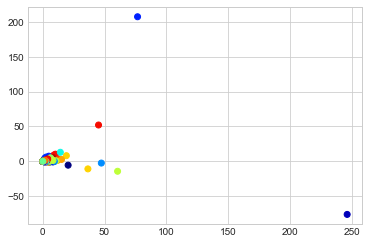

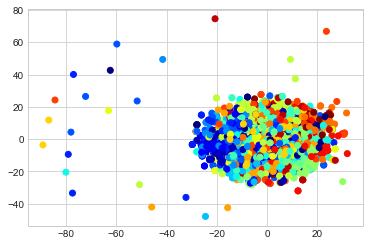

In [36]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

N = len(set(clases))

##Mapa de colores para las 20 clases (N)
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

for embedding in [X_SVD, X_TNSE]:
    fig = plt.figure()    
    ax = plt.axes()
    
    ax.scatter([x[0] for x in embedding],[x[1] for x in embedding], c=clases[:n_samples], cmap=cmap)

### STOPWORDS en español

In [ ]:
## VECTORIZACIÓN EN ESPAÑOL

nltk.download('stopwords')

from nltk.corpus import stopwords
stop = list(stopwords.words('spanish'))
stop.extend('http &apos;'.split())


vectorizer = TfidfVectorizer(analyzer = 'Word',stop_words=set(stop))
vectors = vectorizer.fit_transform(corpus)